In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import ndimage
from PIL import Image

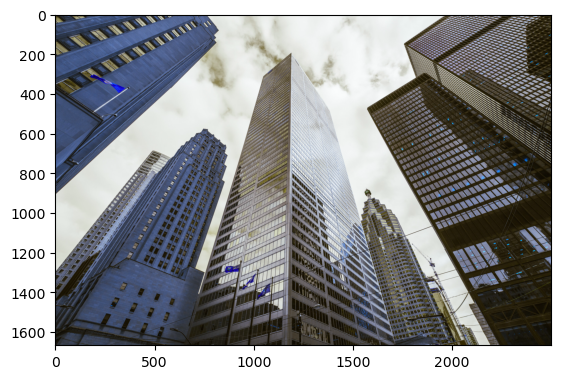

In [2]:
image1 = cv2.imread('finance.jpeg')
plt.subplot(1,1,1), plt.imshow(image1)
plt.show()

In [3]:
def XY(image):
    casa = np.array(image)
    casa = casa[:,:]
    image = cv2.resize(casa, (512,512))
    
    x = np.arange(-image.shape[0]/2, image.shape[0]/2)
    y = np.arange(-image.shape[1]/2, image.shape[1]/2)
    x, y = np.meshgrid(x, y)

    x = np.linspace(-np.pi, np.pi, image.shape[0])
    y = np.linspace(-np.pi, np.pi, image.shape[1])

    # create meshgrid
    X, Y = np.meshgrid(x, y)

    return X, Y

In [4]:
# crop image to square
def crop_to_square(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = image.astype(np.float32)
    #height and width middles
    height, width = image.shape

    height_middle = int(height/2)
    width_middle = int(width/2)

    offset = int((height_middle + width_middle) / 3)
    image = image[height_middle-offset:height_middle+offset, width_middle-offset:width_middle+offset]

    casa = np.array(image)
    casa = casa[:,:]
    casa = cv2.resize(casa, (512,512))
    return casa

In [5]:
img = crop_to_square(image1)


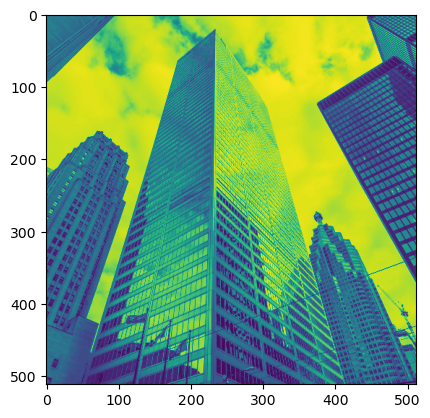

In [6]:
#show
plt.subplot(1,1,1), plt.imshow(img)
plt.show()

# Fournier Transormation => NumPy FFT

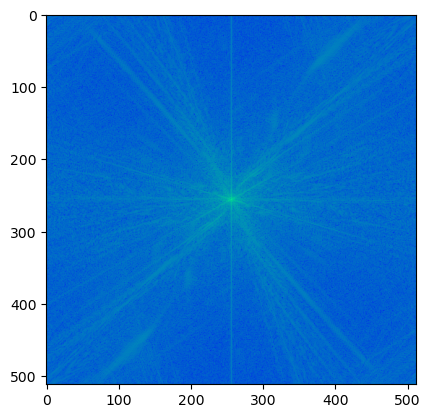

<function matplotlib.pyplot.savefig(*args, **kwargs)>

In [7]:
fft = np.fft.fft2(img)
fft_shift = np.fft.fftshift(fft)
magnitude_spectrum = 20*np.log(np.abs(fft_shift))

plt.subplot(1,1,1), plt.imshow(magnitude_spectrum, cmap = 'winter')
plt.show()
plt.savefig

In [8]:
# save
cv2.imwrite('finance_magnitude_spectrum.jpg', magnitude_spectrum)

True

### Blurring using low-pass filter

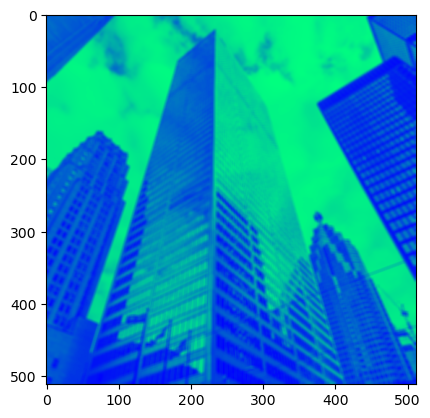

In [9]:
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)
plt.subplot(1,1,1), plt.imshow(dst, cmap = 'winter')
plt.show()

In [10]:
# save
cv2.imwrite('dst.jpg', dst)

True

### Sharpening using high pass filter

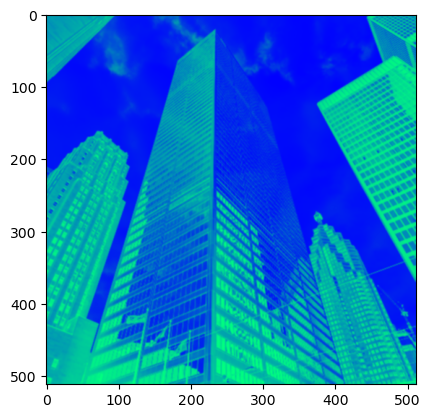

In [11]:
kernel_ = np.array([[-1,-1,-1], [-1,-3,-1], [-1,-1,-1]])
sharpened = cv2.filter2D(img, -1, kernel_)
plt.subplot(1,1,1), plt.imshow(sharpened, cmap = 'winter')
plt.show()

# Fournier Transformation => scipy

In [12]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image
from scipy import signal
from numpy.fft import fft2, fftshift, ifft2

In [13]:
# Read image
img = Image.open('casaloma_resized.jpg').convert('L')

In [14]:
# Fourier transfor
F = fft2(img)
F = fftshift(F)

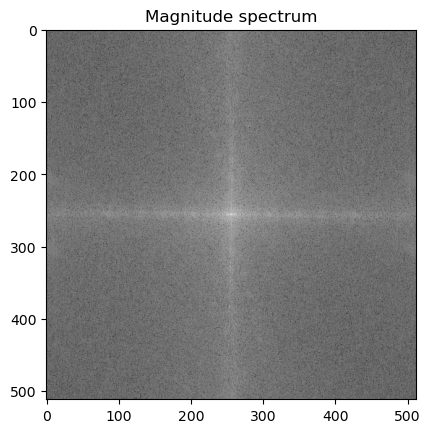

In [15]:
# Show magnitude spectrum
plt.figure()
plt.imshow(np.log(np.abs(F)), cmap='gray')
plt.title('Magnitude spectrum')
plt.show()

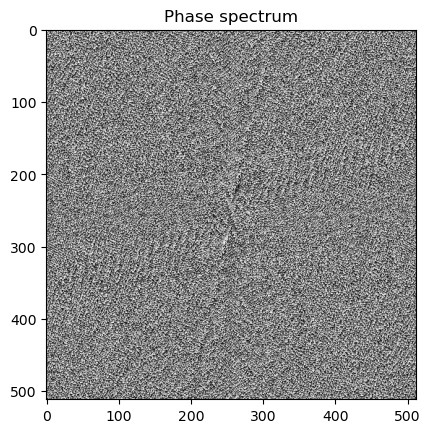

In [16]:
# Show phase spectrum
plt.figure()
plt.imshow(np.angle(F), cmap='gray')
plt.title('Phase spectrum')
plt.show()

In [17]:
# use XY 
x, y = XY(img)

# define gaussian filter
def gaussian_filter(x, y, sigma_x, sigma_y):
    return gaussian(x, y, sigma_x, sigma_y)

# define gaussian filter
def gaussian(x, y, sigma_x, sigma_y):
    return np.exp(-((x**2)/(2*sigma_x**2) + (y**2)/(2*sigma_y**2)))

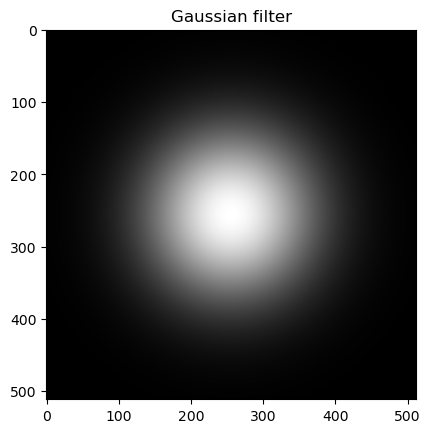

In [18]:
# use
gaussian_filter = gaussian_filter(x, y, 1, 1)

# show
plt.figure()
plt.imshow(gaussian_filter, cmap='gray')
plt.title('Gaussian filter')
plt.show()


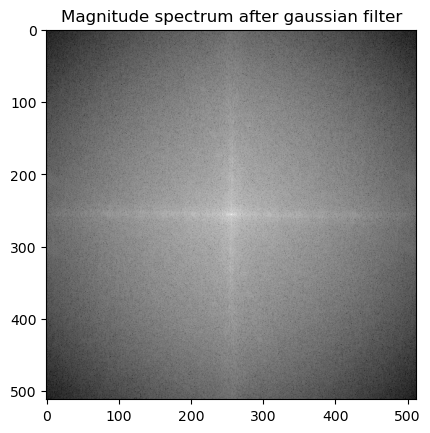

In [19]:
# apply gaussian filter
F_gaussian = F * gaussian_filter

# show
plt.figure()
plt.imshow(np.log(np.abs(F_gaussian)), cmap='gray')
plt.title('Magnitude spectrum after gaussian filter')
plt.show()



In [22]:
# define gaussian with fournier
def gaussian_fourier(x, y, sigma_x, sigma_y):
    return np.exp(-((x**2)/(2*sigma_x**2) + (y**2)/(2*sigma_y**2)))

# define gaussian filter
def gaussian_filter_fourier(x, y, sigma_x, sigma_y):
    # define x and y
    x = np.linspace(-np.pi, np.pi, img.shape[0])
    y = np.linspace(-np.pi, np.pi, img.shape[1])

    # create meshgrid
    X, Y = np.meshgrid(x, y)

    return gaussian_fourier(X, Y, sigma_x, sigma_y)

In [24]:
# use
gaussian_filter_fourier = gaussian_filter_fourier(x, y, 1, 1)

# show
plt.figure()
plt.imshow(gaussian_filter_fourier, cmap='gray')
plt.title('Gaussian filter fourier')
plt.show()



AttributeError: shape

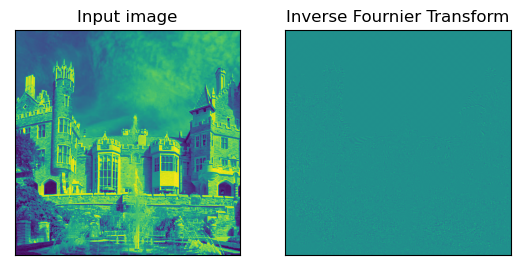

In [23]:
# undo shift operation
F2 = ifft2(F)
# take the real part of the inverse transform
F3 = np.real(F2)
# normalize the image to the range [0,1] so that we can display it using imshow().
F3 = F3/np.max(F3)

plt.subplot(121), plt.imshow(img, cmap = 'viridis')
plt.title('Input image'), plt.xticks([]),plt.yticks([])
plt.subplot(122), plt.imshow(F3, cmap = 'viridis')
plt.title('Inverse Fournier Transform'), plt.xticks([]),plt.yticks([])
plt.show()

## Gaussian Window and Laplacian Gaussian
#### Mathematical functions are supplemented from Wikipedia and turned into code

In [ ]:
# The Gaussian window is defined here
def gaussian_window(shape, sigma=1):
    m, n = [(ss-1.)/2. for ss in shape]
    y, x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    return h

# The Gaussian filter is defined here
def gaussian_filter(shape, sigma=1):
    h = gaussian_window(shape, sigma)
    hsum = np.sum(h)
    if hsum != 0:
        h /= hsum
    return h

# The Gaussian filter is applied here
def apply_gaussian_filter(image, sigma=1):
    h = gaussian_filter(image.shape, sigma)
    filtered_image = signal.convolve2d(image, h, mode='same', boundary='symm')
    return filtered_image

In [ ]:
filtered_image = apply_gaussian_filter(y, sigma=1)

In [ ]:
plt.subplot(121), plt.imshow(casa, cmap = 'viridis')
plt.title('Input image'), plt.xticks([]),plt.yticks([])
plt.subplot(122), plt.imshow(filtered_image, cmap = 'viridis')
plt.title('Gaussian Filter'), plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
# The Laplacian of Gaussian filter is defined here
def laplacian_of_gaussian_filter(shape, sigma=1):
    m, n = [(ss-1.)/2. for ss in shape]
    y, x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    h = -h * (x*x + y*y - 2*sigma*sigma) / (sigma*sigma*sigma*sigma)
    hsum = np.sum(h)
    if hsum != 0:
        h /= hsum
    return h

# The Laplacian of Gaussian filter is applied here
def apply_laplacian_of_gaussian_filter(image, sigma=1):
    h = laplacian_of_gaussian_filter(image.shape, sigma)
    filtered_image = signal.convolve2d(image, h, mode='same', boundary='symm')
    return filtered_image

In [ ]:
lap_filtered_image = apply_laplacian_of_gaussian_filter(y, sigma=1)

plt.subplot(121), plt.imshow(casa, cmap = 'viridis')
plt.title('Input image'), plt.xticks([]),plt.yticks([])
plt.subplot(122), plt.imshow(lap_filtered_image, cmap = 'viridis')
plt.title('Laplacian of Gaussian Filter'), plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
lap_filtered_image = lap_filtered_image/np.max(lap_filtered_image)
lap_filtered_image = lap_filtered_image*255
lap_filtered_image = lap_filtered_image.astype(np.uint8)
lap_filtered_image = Image.fromarray(lap_filtered_image)
lap_filtered_image.save('lap_filtered_image.png')

## Sharpening using high pass filter

#### Seperating the low frequency of the image from Gaussian, helped us acquire the high pass efficiently

In [ ]:
# Sharpening high pass
def sharpening_high_pass(image, sigma=1):
    h = laplacian_of_gaussian_filter(image.shape, sigma)
    filtered_image = signal.convolve2d(image, h, mode='same', boundary='symm')
    filtered_image = image + filtered_image
    return filtered_image

sharp_filtered_image = sharpening_high_pass(y, sigma=100)

plt.subplot(121), plt.imshow(casa, cmap = 'viridis')
plt.title('Input image'), plt.xticks([]),plt.yticks([])
plt.subplot(122), plt.imshow(sharp_filtered_image, cmap = 'viridis')
plt.title('Gaussian Filter'), plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
def high_pass_filter(image, sigma=1):
    h = gaussian_filter(image.shape, sigma)
    filtered_image = image - h
    return filtered_image

hpf_filtered_image = high_pass_filter(y, sigma=100)

plt.subplot(121), plt.imshow(casa, cmap = 'viridis')
plt.title('Input image'), plt.xticks([]),plt.yticks([])
plt.subplot(122), plt.imshow(hpf_filtered_image, cmap = 'viridis')
plt.title('Sharpening Pass Filter'), plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
# save hpf_filtered_image
cv2.imwrite('hpf_filtered_image.jpg', hpf_filtered_image)

# Edge detection

In [ ]:
from skimage import filters

def sobel(image):
    # sobel filter
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    # apply sobel filter
    sobel_x = signal.convolve2d(image, sobel_x, mode='same', boundary='symm')
    sobel_y = signal.convolve2d(image, sobel_y, mode='same', boundary='symm')

    # calculate magnitude
    sobel = np.sqrt(sobel_x**2 + sobel_y**2)

    return sobel

sobel_filtered_image = sobel(y)

In [ ]:
plt.subplot(121), plt.imshow(casa, cmap = 'viridis')
plt.title('Input image'), plt.xticks([]),plt.yticks([])
plt.subplot(122), plt.imshow(sobel_filtered_image, cmap = 'viridis')
plt.title('Edge Detection'), plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
cv2.imwrite('sobel_filtered_image.jpg', sobel_filtered_image)

In [ ]:
# define prewitt
def prewitt(image):
    # prewitt filter
    prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

    # apply prewitt filter
    prewitt_x = signal.convolve2d(image, prewitt_x, mode='same', boundary='symm')
    prewitt_y = signal.convolve2d(image, prewitt_y, mode='same', boundary='symm')

    # calculate magnitude
    prewitt = np.sqrt(prewitt_x**2 + prewitt_y**2)

    return prewitt

prewitt_filtered_image = prewitt(y)

plt.subplot(121), plt.imshow(casa, cmap = 'viridis')
plt.title('Input image'), plt.xticks([]),plt.yticks([])
plt.subplot(122), plt.imshow(prewitt_filtered_image, cmap = 'viridis')
plt.title('Edge Detection'), plt.xticks([]),plt.yticks([])
plt.show()

cv2.imwrite('prewitt_filtered_image.jpg', prewitt_filtered_image)

# Noise Suppression

In [ ]:
import random

def gaussian_noise(image, mean=0, var=0.1):
    row, col = image.shape
    sigma = var**0.5
    gauss = np.random.normal(mean, sigma, (row, col))
    gauss = gauss.reshape(row, col)
    noisy = image + gauss
    return noisy

def salt_pepper_noise(image, prob=0.05):
    output = np.zeros(image.shape, np.uint8)
    thres = 1 - prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

In [ ]:
gauss_noisy_image = gaussian_noise(y, mean=3, var=0.5)
saltpep_noisy_image = salt_pepper_noise(y, prob=0.05)

In [ ]:
cv2.imwrite('saltpep_noisy_image.jpg', saltpep_noisy_image)

In [ ]:
plt.subplot(131), plt.imshow(casa, cmap = 'viridis')
plt.title('Input image'), plt.xticks([]),plt.yticks([])
plt.subplot(132), plt.imshow(gauss_noisy_image, cmap = 'viridis')
plt.title('Gaussian Noise'), plt.xticks([]),plt.yticks([])
plt.subplot(133), plt.imshow(saltpep_noisy_image, cmap = 'viridis')
plt.title('Salt and Pepper Noise'), plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
# define denoiser
def denoiser(image, kernel_size=3):
    # apply median filter
    denoised_image = cv2.medianBlur(image, kernel_size)
    return denoised_image

denoised_image = denoiser(saltpep_noisy_image, kernel_size=3)

In [ ]:
plt.subplot(131), plt.imshow(saltpep_noisy_image, cmap = 'viridis')
plt.title('Salt & Pepper'), plt.xticks([]),plt.yticks([])
plt.subplot(132), plt.imshow(denoised_image, cmap = 'viridis')
plt.title('Denoised Salt & Pepper'), plt.xticks([]),plt.yticks([])

In [ ]:
# save denoised_image
cv2.imwrite('saltPep_denoised_image.jpg', denoised_image)